# Intro to Data Science - Homework 5 - Fall 2024 - Wilmington College
## Due Date: April 26, 2024, 11:30 AM (Before the Start of Our Class)

Dear Students,

Welcome to Homework 5 for the Intro to Data Science course.

**Submission Instructions:**
Please complete the homework and commit your changes to GitHub. 

Last part of each problem dedicated to this question: "How long did it take you to solve this question? Was it easy, medium, or hard for you? Feel free to share any comments you have."

**Alternative Submission:**
If, for any reason, you are unable to use GitHub, you can submit your work via email.

Remember, timely completion of assignments is crucial for your understanding of the course material. If you face any challenges, don't hesitate to reach out.

## Exercise 1: Group Transformations
Consider a dataset containing information about students' exam scores across multiple subjects. The dataset is structured as follows:


a) Write a function `normalize_scores` that takes a group as input and normalizes the scores within each subject to have a mean of 0 and a standard deviation of 1. Then, apply the `normalize_scores` function to the 'Score' column grouped by the 'Subject' column.
c) Compute the ranks of students within each subject in ascending order using a custom function.

In [1]:
import pandas as pd

data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Subject': ['Math', 'Math', 'Science', 'Science', 'English', 'English', 'Math', 'Science', 'English', 'Math'],
    'Score': [85, 90, 78, 82, 88, 92, 75, 80, 85, 88]
}

df = pd.DataFrame(data)
df

,Student_ID,Subject,Score
0,1,Math,85
1,2,Math,90
2,3,Science,78
3,4,Science,82
4,5,English,88
5,6,English,92
6,7,Math,75
7,8,Science,80
8,9,English,85
9,10,Math,88


### Solution:

a) Write a function `normalize_scores` that takes a group as input and normalizes the scores within each subject to have a mean of 0 and a standard deviation of 1. Then apply the `normalize_scores` function to the 'Score' column grouped by the 'Subject' column.

In [2]:
# Define the function
def normalize_scores(group):
    mean = group.mean()  # Calculate the mean of the group
    std = group.std()    # Calculate the standard deviation of the group
    return (group - mean) / std  # Normalize the scores


grouped = df.groupby('Subject')['Score']
normalized_scores = grouped.transform(normalize_scores)
normalized_scores

0    0.075094
1    0.826033
2   -1.000000
3    1.000000
4   -0.094916
5    1.044074
6   -1.426785
7    0.000000
8   -0.949158
9    0.525657
Name: Score, dtype: float64

In [ ]:
# c) Compute the ranks of students within each subject in ascending order using a custom function.

# Define the function
def compute_ranks(group):
    return group.rank()

# Test the function
ranks = grouped.transform(compute_ranks)
print(ranks)

## Exercise 2: Pivot Tables
Consider a sales dataset containing information about products, sales amounts, and sales regions. The dataset is structured as follows:

a) Create a pivot table that shows the total sales amount for each product in each region.
b) Calculate the average sales amount for each product across all regions.
c) Extend the pivot table to include the sum of sales amounts for each region.
d) Compute the median sales amount for each product within each region.

In [6]:
data = {
    'Product': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'East'],
    'Sales': [1000, 1200, 800, 900, 1100, 700, 950, 1250, 850]
}

df = pd.DataFrame(data)
df

,Product,Region,Sales
0,A,North,1000
1,B,North,1200
2,C,North,800
3,A,South,900
4,B,South,1100
5,C,South,700
6,A,East,950
7,B,East,1250
8,C,East,850


### Solution:

a) Create a pivot table that shows the total sales amount for each product in each region.

In [5]:
pd.pivot_table(df, index='Product', columns='Region', values='Sales', aggfunc='sum')

Region,East,North,South
Product,,,
A,950,1000,900
B,1250,1200,1100
C,850,800,700


In [7]:
# b) Calculate the average sales amount for each product across all regions.

pd.pivot_table(df, index='Product', values='Sales', aggfunc='mean')

,Sales
Product,
A,950.000000
B,1183.333333
C,783.333333


In [8]:
# c) Extend the pivot table to include the sum of sales amounts for each region.

pd.pivot_table(df, index='Product', values='Sales', aggfunc={'Sales': 'sum'}, margins=True)

,Sales
Product,
A,2850
B,3550
C,2350
All,8750


In [9]:
# d) Compute the median sales amount for each product within each region.

pd.pivot_table(df, index='Product', columns='Region', values='Sales', aggfunc='median')

Region,East,North,South
Product,,,
A,950.0,1000.0,900.0
B,1250.0,1200.0,1100.0
C,850.0,800.0,700.0


## Exercise 3: Cross-Tabulation
Consider a survey dataset containing information about participants' age groups, gender, and favorite leisure activities. The dataset is structured as follows:

a) Create a cross-tabulation showing the count of participants by age group and gender.
b) Compute the percentage of participants by age group and favorite leisure activity.
c) Extend the cross-tabulation to include the sum of participants by gender.
d) Calculate the ratio of male to female participants within each age group.

In [10]:
data = {
    'Age_Group': ['18-25', '26-35', '36-45', '18-25', '26-35', '36-45'],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Activity': ['Reading', 'Sports', 'Music', 'Sports', 'Music', 'Reading']
}

df = pd.DataFrame(data)
df

,Age_Group,Gender,Activity
0,18-25,Male,Reading
1,26-35,Male,Sports
2,36-45,Female,Music
3,18-25,Female,Sports
4,26-35,Male,Music
5,36-45,Female,Reading


### Solution:
a) Create a cross-tabulation showing the count of participants by age group and gender.


In [11]:
pd.crosstab(df['Age_Group'], df['Gender'])

Gender,Female,Male
Age_Group,,
18-25,1,1
26-35,0,2
36-45,2,0


In [12]:
# b) Compute the percentage of participants by age group and favorite leisure activity.

pd.crosstab(df['Age_Group'], df['Activity'], normalize='index') * 100

Activity,Music,Reading,Sports
Age_Group,,,
18-25,0.0,50.0,50.0
26-35,50.0,0.0,50.0
36-45,50.0,50.0,0.0


In [15]:
# c) Extend the cross-tabulation to include the sum of participants by gender.

cross_tab_c = pd.crosstab(df['Age_Group'], df['Gender'], margins=True, margins_name='Total')
cross_tab_c

Gender,Female,Male,Total
Age_Group,,,
18-25,1,1,2
26-35,0,2,2
36-45,2,0,2
Total,3,3,6


In [17]:
# d) Calculate the ratio of male to female participants within each age group.

def male_to_female_ratio(group):
    if group['Female'] == 0:
        return 0  # Returning 0 if no female participants
    else:
        return group['Male'] / group['Female']

cross_tab_d = cross_tab_c.copy()
cross_tab_d['Male_to_Female_Ratio'] = cross_tab_c.apply(male_to_female_ratio, axis=1)
cross_tab_d

Gender,Female,Male,Total,Male_to_Female_Ratio
Age_Group,,,,
18-25,1,1,2,1.0
26-35,0,2,2,0.0
36-45,2,0,2,0.0
Total,3,3,6,1.0


## Exercise 4:

Consider the following time series data representing the daily temperature readings (in degrees Celsius) for a particular location:

1. **Calculate the following statistics for the temperature data:**
   a. Mean temperature for the year.
   b. Standard deviation of the temperature readings.
   c. Maximum temperature and the date on which it occurred.
   d. Minimum temperature and the date on which it occurred.

2. **Find the number of days where the temperature was above the yearly average.**

3. **Resample the data to a monthly frequency and calculate the following statistics for each month:**
   a. Mean temperature.
   b. Standard deviation of temperature.
   c. Maximum temperature and the date on which it occurred.
   d. Minimum temperature and the date on which it occurred.

4. **Plot the original daily temperature data and the resampled monthly mean temperature data on the same graph. Ensure appropriate labeling of the axes and a legend for clarity.**

In [21]:
import pandas as pd
import numpy as np

# Generating a date range for the index
dates = pd.date_range('2023-01-01', periods=365, freq='D')

# Generating random numerical data for the time series
data = np.random.randn(len(dates))

# Creating a pandas Series with the generated data and using dates as index
time_series = pd.Series(data, index=dates)
time_series


2023-01-01    0.390157
2023-01-02    0.085615
2023-01-03   -3.114024
2023-01-04   -2.242359
2023-01-05    0.687576
                ...   
2023-12-27    0.066585
2023-12-28   -0.323147
2023-12-29   -0.106329
2023-12-30   -0.228707
2023-12-31    0.666423
Freq: D, Length: 365, dtype: float64

### Solution:

1. **Calculate the following statistics for the temperature data:**
   a. Mean temperature for the year.
   b. Standard deviation of the temperature readings.
   c. Maximum temperature and the date on which it occurred.
   d. Minimum temperature and the date on which it occurred.

In [22]:
# a. Mean temperature for the year.
time_series.mean()

# b. Standard deviation of the temperature readings.
time_series.std()

# c. Maximum temperature and the date on which it occurred.
time_series.max()
time_series.idxmax()

# d. Minimum temperature and the date on which it occurred.
time_series.min()
time_series.idxmin()

Timestamp('2023-01-03 00:00:00')

In [25]:
#2. **Find the number of days where the temperature was above the yearly average.**

(time_series > time_series.mean()).sum()

183

3. **Resample the data to a monthly frequency and calculate the following statistics for each month:**
   a. Mean temperature.
   b. Standard deviation of temperature.
   c. Maximum temperature and the date on which it occurred.
   d. Minimum temperature and the date on which it occurred.

In [26]:
# a. Mean temperature for each month.
time_series.resample('M').mean()

2023-01-31   -0.167503
2023-02-28    0.065209
2023-03-31    0.195514
2023-04-30   -0.138686
2023-05-31   -0.436441
2023-06-30   -0.177025
2023-07-31    0.075031
2023-08-31   -0.031526
2023-09-30   -0.372935
2023-10-31   -0.119442
2023-11-30    0.041610
2023-12-31   -0.268576
Freq: M, dtype: float64

In [27]:
# b. Standard deviation of temperature for each month.
time_series.resample('M').std()

2023-01-31    1.065168
2023-02-28    0.807389
2023-03-31    0.938787
2023-04-30    0.943199
2023-05-31    0.986474
2023-06-30    1.048377
2023-07-31    0.914504
2023-08-31    0.875159
2023-09-30    0.895103
2023-10-31    0.680871
2023-11-30    0.818529
2023-12-31    0.744203
Freq: M, dtype: float64

In [28]:
# c. Maximum temperature and the date on which it occurred for each month.
time_series.resample('M').max()
time_series.groupby(pd.Grouper(freq='M')).idxmax()

2023-01-31   2023-01-14
2023-02-28   2023-02-01
2023-03-31   2023-03-19
2023-04-30   2023-04-27
2023-05-31   2023-05-12
2023-06-30   2023-06-12
2023-07-31   2023-07-25
2023-08-31   2023-08-22
2023-09-30   2023-09-20
2023-10-31   2023-10-07
2023-11-30   2023-11-18
2023-12-31   2023-12-04
Freq: M, dtype: datetime64[ns]

In [29]:
# d. Minimum temperature and the date on which it occurred for each month.
time_series.resample('M').min()
time_series.groupby(pd.Grouper(freq='M')).idxmin()

2023-01-31   2023-01-03
2023-02-28   2023-02-11
2023-03-31   2023-03-20
2023-04-30   2023-04-15
2023-05-31   2023-05-02
2023-06-30   2023-06-22
2023-07-31   2023-07-23
2023-08-31   2023-08-23
2023-09-30   2023-09-01
2023-10-31   2023-10-13
2023-11-30   2023-11-24
2023-12-31   2023-12-12
Freq: M, dtype: datetime64[ns]

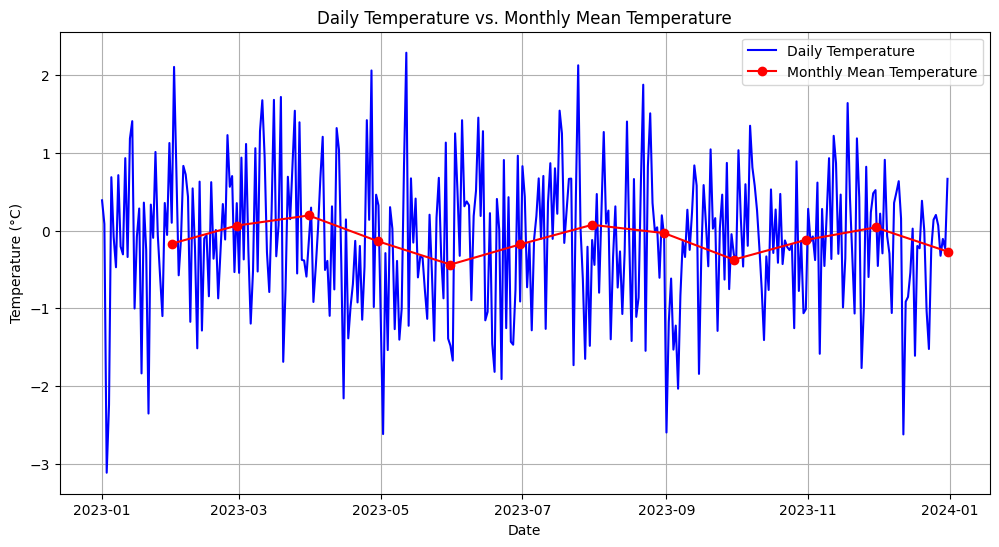

In [32]:
#4. **Plot the original daily temperature data and the resampled monthly mean temperature data on the same graph. Ensure appropriate labeling of the axes and a legend for clarity.**


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Daily Temperature', color='blue')
plt.plot(time_series.resample('M').mean().index, time_series.resample('M').mean(), label='Monthly Mean Temperature', marker='o', linestyle='-', color='red')
plt.title('Daily Temperature vs. Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 5:

Suppose you have a dataset containing the temperature readings in Celsius for a specific location over a period of time. The dataset is indexed by timestamps representing the date and time of each reading.

1. **Time Zone Conversion**: Convert the timestamps in the dataset from the local time zone ('America/New_York') to UTC.
2. **Temperature Shifting**: Shift the temperature data by 1 hour backward.
4. **Resampling**: Resample the dataset to represent daily average temperatures.
5. **Visualization**: Plot the original temperature data against the resampled data to visualize the changes.

In [34]:
# Create sample data
np.random.seed(0)
dates = pd.date_range('2024-01-01', periods=100, freq='H')
temperatures = np.random.randint(-10, 30, size=(100,))
temperature_data = pd.Series(temperatures, index=dates)
temperature_data

2024-01-01 00:00:00   -10
2024-01-01 01:00:00    -7
2024-01-01 02:00:00    -7
2024-01-01 03:00:00    29
2024-01-01 04:00:00    -1
                       ..
2024-01-04 23:00:00    -7
2024-01-05 00:00:00    24
2024-01-05 01:00:00     3
2024-01-05 02:00:00    29
2024-01-05 03:00:00    11
Freq: H, Length: 100, dtype: int64

### Solution:

1. **Time Zone Conversion**: Convert the timestamps in the dataset from the local time zone ('America/New_York') to UTC.

In [35]:

temperature_data.tz_localize('America/New_York').tz_convert('UTC')

2024-01-01 05:00:00+00:00   -10
2024-01-01 06:00:00+00:00    -7
2024-01-01 07:00:00+00:00    -7
2024-01-01 08:00:00+00:00    29
2024-01-01 09:00:00+00:00    -1
                             ..
2024-01-05 04:00:00+00:00    -7
2024-01-05 05:00:00+00:00    24
2024-01-05 06:00:00+00:00     3
2024-01-05 07:00:00+00:00    29
2024-01-05 08:00:00+00:00    11
Length: 100, dtype: int64

In [36]:
#2. **Temperature Shifting**: Shift the temperature data by 1 hour backward.

temperature_data.shift(-1, freq='H')

2023-12-31 23:00:00   -10
2024-01-01 00:00:00    -7
2024-01-01 01:00:00    -7
2024-01-01 02:00:00    29
2024-01-01 03:00:00    -1
                       ..
2024-01-04 22:00:00    -7
2024-01-04 23:00:00    24
2024-01-05 00:00:00     3
2024-01-05 01:00:00    29
2024-01-05 02:00:00    11
Freq: H, Length: 100, dtype: int64

In [40]:
#3. **Resampling**: Resample the dataset to represent daily average temperatures.
daily_average_temperature  = temperature_data.resample('D').mean()
daily_average_temperature 

2024-01-01     8.875000
2024-01-02    10.791667
2024-01-03     7.166667
2024-01-04     7.708333
2024-01-05    16.750000
Freq: D, dtype: float64

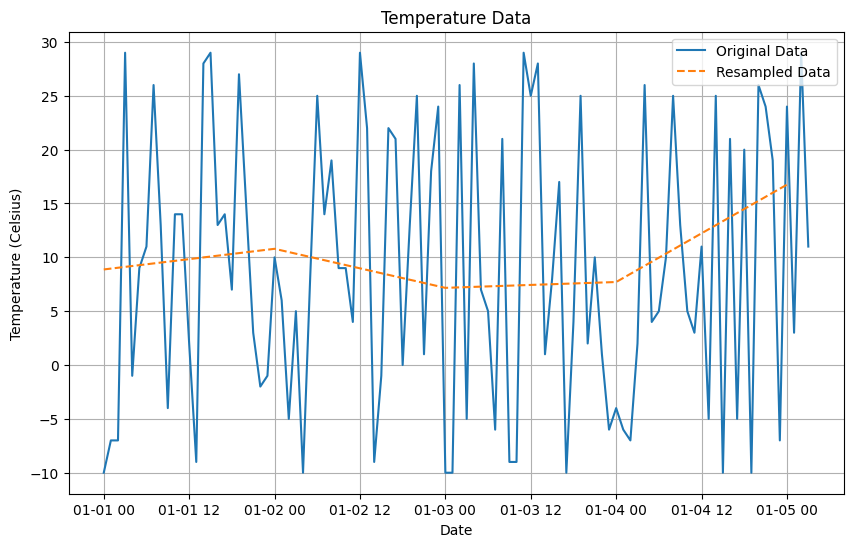

In [41]:
#5. **Visualization**: Plot the original temperature data against the resampled data to visualize the changes.

plt.figure(figsize=(10, 6))
plt.plot(temperature_data.index, temperature_data.values, label='Original Data')
plt.plot(daily_average_temperature.index, daily_average_temperature.values, label='Resampled Data', linestyle='--')
plt.title('Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6: Resampling and Moving Window Functions

Consider the following time series data representing the daily stock prices of three companies: Apple (AAPL), Microsoft (MSFT), and ExxonMobil (XOM).

1. **Resampling**
    a. Resample the data to a monthly frequency, taking the mean of each month's values.
    b. Resample the data to a quarterly frequency, taking the sum of each quarter's values.
    c. Resample the data to a weekly frequency, using forward filling to fill missing values.

2. **Moving Window Functions**
    a. Calculate the 30-day rolling average for each company's stock price.
    b. Calculate the 60-day rolling standard deviation for each company's stock price.
    c. Plot the 50-day exponentially weighted moving average (EWMA) for the Apple stock price alongside its actual price.


In [42]:
# Generate sample data
np.random.seed(0)
dates = pd.date_range("2022-01-01", periods=500)
stock_prices = pd.DataFrame(
    {
        "AAPL": np.random.normal(150, 10, 500),
        "MSFT": np.random.normal(100, 5, 500),
        "XOM": np.random.normal(50, 2, 500),
    },
    index=dates,
)
stock_prices.head()

,AAPL,MSFT,XOM
2022-01-01,167.640523,101.913662,51.111925
2022-01-02,154.001572,99.828789,51.784948
2022-01-03,159.787380,105.481734,49.155370
2022-01-04,172.408932,98.828921,50.209428
2022-01-05,168.675580,98.262747,50.456107


### Solution:

1. **Resampling**
    a. Resample the data to a monthly frequency, taking the mean of each month's values.
    b. Resample the data to a quarterly frequency, taking the sum of each quarter's values.
    c. Resample the data to a weekly frequency, using forward filling to fill missing values.

In [43]:
# a. Resample the data to a monthly frequency, taking the mean of each month's values.
stock_prices.resample('M').mean()



,AAPL,MSFT,XOM
2022-01-31,154.335691,98.953869,49.926940
2022-02-28,146.972192,99.188173,50.590579
2022-03-31,148.588913,98.729817,49.504702
2022-04-30,155.108334,98.634013,50.510185
2022-05-31,150.911578,100.436514,50.037935
2022-06-30,149.232252,98.300823,50.787391
2022-07-31,149.536256,100.511993,49.972422
2022-08-31,148.476571,98.799979,50.248071
2022-09-30,147.210386,99.950015,49.987890
2022-10-31,151.904889,99.154510,49.647069


In [44]:
# b. Resample the data to a quarterly frequency, taking the sum of each quarter's values.
stock_prices.resample('Q').sum()



,AAPL,MSFT,XOM
2022-03-31,13505.884079,8905.463096,4498.917095
2022-06-30,13808.476499,9021.577012,4590.103249
2022-09-30,13654.709207,9177.171576,4606.471990
2022-12-31,13735.361822,9179.927296,4581.032617
2023-03-31,13424.741367,9011.096769,4507.499538
2023-06-30,6744.054829,4541.866812,2245.172521


In [45]:
# c. Resample the data to a weekly frequency, using forward filling to fill missing values.
stock_prices.resample('W').ffill()

,AAPL,MSFT,XOM
2022-01-02,154.001572,99.828789,51.784948
2022-01-09,148.967811,94.104210,49.901352
2022-01-16,153.336743,100.879095,48.185400
2022-01-23,158.644362,91.593909,49.165045
2022-01-30,164.693588,104.320262,48.962200
...,...,...,...
2023-04-23,141.175812,95.679775,50.347424
2023-04-30,158.625960,95.310599,51.375763
2023-05-07,146.500566,100.893964,48.519726
2023-05-14,139.819581,94.261945,47.841314


2. **Moving Window Functions**
    a. Calculate the 30-day rolling average for each company's stock price.
    b. Calculate the 60-day rolling standard deviation for each company's stock price.
    c. Plot the 50-day exponentially weighted moving average (EWMA) for the Apple stock price alongside its actual price.

In [46]:
# a. Calculate the 30-day rolling average for each company's stock price.
stock_prices.rolling(window=30).mean()



,AAPL,MSFT,XOM
2022-01-01,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN
...,...,...,...
2023-05-11,150.673098,101.247090,50.234598
2023-05-12,150.773749,101.211985,50.214144
2023-05-13,150.866710,100.966140,50.145851
2023-05-14,151.290236,100.659800,50.076277


In [47]:
# b. Calculate the 60-day rolling standard deviation for each company's stock price.
stock_prices.rolling(window=60).std()



,AAPL,MSFT,XOM
2022-01-01,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN
...,...,...,...
2023-05-11,10.778496,4.337722,1.924630
2023-05-12,10.764948,4.266186,1.916500
2023-05-13,10.786289,4.170738,1.889833
2023-05-14,10.813670,4.215371,1.910845


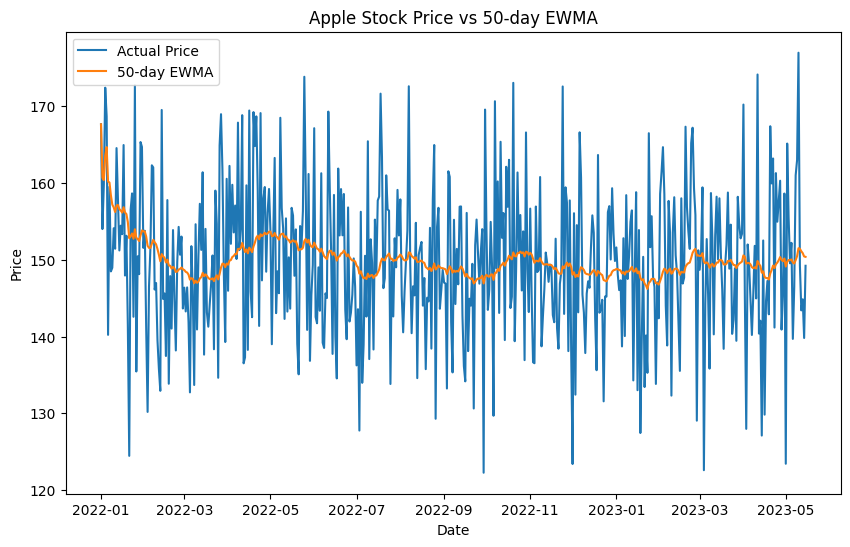

In [48]:
# c. Plot the 50-day exponentially weighted moving average (EWMA) for the Apple stock price alongside its actual price.
ewma = stock_prices['AAPL'].ewm(span=50).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.index, stock_prices['AAPL'], label='Actual Price')
plt.plot(stock_prices.index, ewma, label='50-day EWMA')
plt.title('Apple Stock Price vs 50-day EWMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Exercise 7: Modeling with Patsy Formulas

Consider a dataset containing information about students' performance in various subjects. The dataset includes the following columns:

- `Math_Score`: The score obtained by the student in the Math exam.
- `Science_Score`: The score obtained by the student in the Science exam.
- `English_Score`: The score obtained by the student in the English exam.
- `Gender`: The gender of the student (Male or Female).
- `School_Type`: The type of school attended by the student (Public or Private).

Your task is to perform the following modeling tasks using Patsy formulas:

1. **Feature Engineering**:
    a. Create a new feature called `Total_Score` by summing up the scores obtained by the student in all subjects.
    b. Create dummy variables for the `Gender` column.
    c. Create dummy variables for the `School_Type` column.

2. **Modeling**:
    a. Using the Patsy formula syntax, create a linear model to predict the `Total_Score` based on the scores obtained in individual subjects (`Math_Score`, `Science_Score`, `English_Score`), gender (`Gender`), and school type (`School_Type`).
    b. Fit the model to the dataset and extract the coefficients associated with each predictor variable.
    c. Interpret the coefficients obtained from the model in terms of how they contribute to the predicted total score.

In [52]:
# Sample data
data = pd.DataFrame({
    'Math_Score': [85, 90, 78, 65, 95],
    'Science_Score': [75, 85, 80, 70, 90],
    'English_Score': [80, 70, 85, 75, 95],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'School_Type': ['Public', 'Private', 'Public', 'Public', 'Private']
})
data

,Math_Score,Science_Score,English_Score,Gender,School_Type
0,85,75,80,Male,Public
1,90,85,70,Female,Private
2,78,80,85,Male,Public
3,65,70,75,Female,Public
4,95,90,95,Male,Private


### Solution:

1. **Feature Engineering**:
    a. Create a new feature called `Total_Score` by summing up the scores obtained by the student in all subjects.
    b. Create dummy variables for the `Gender` column.
    c. Create dummy variables for the `School_Type` column.

In [67]:
# a. Create a new feature called `Total_Score` by summing up the scores obtained by the student in all subjects.
data['Total_Score'] = data['Math_Score'] + data['Science_Score'] + data['English_Score']
data

,Math_Score,Science_Score,English_Score,Gender,School_Type,Total_Score
0,85,75,80,Male,Public,240
1,90,85,70,Female,Private,245
2,78,80,85,Male,Public,243
3,65,70,75,Female,Public,210
4,95,90,95,Male,Private,280


In [70]:
# b. Create dummy variables for the `Gender` column.
dummy_gender = pd.get_dummies(data['Gender'], prefix='Gender', dtype='float')
dummy_gender

,Gender_Female,Gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [69]:
# c. Create dummy variables for the `School_Type` column.
dummy_school_type = pd.get_dummies(data['School_Type'], prefix='School_Type', dtype='float')
dummy_school_type

,School_Type_Private,School_Type_Public
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


2. **Modeling**:
    a. Using the Patsy formula syntax, create a linear model to predict the `Total_Score` based on the scores obtained in individual subjects (`Math_Score`, `Science_Score`, `English_Score`), gender (`Gender`), and school type (`School_Type`).
    b. Fit the model to the dataset and extract the coefficients associated with each predictor variable.

In [64]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 57.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 6.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


In [66]:
# Modeling
import statsmodels.api as sm 
import patsy

formula = 'Total_Score ~ Math_Score + Science_Score + English_Score + Gender + School_Type'
y, X = patsy.dmatrices(formula, data, return_type='dataframe')

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Extract coefficients
results.params

Intercept                0.011633
Gender[T.Male]           0.001588
School_Type[T.Public]   -0.001824
Math_Score               0.999941
Science_Score            0.999962
English_Score            0.999956
dtype: float64